# Best practices

In this tutorial, we will explore some best practices and optimizations to help you get the most out of Vertica and VerticaPy.

## 1. Restrict objects and operations to essential columns 

As VerticaPy is effectively an abstraction of SQL, any database-level optimizations you make in your Vertica database carry over to VerticaPy. In Vertica, optimization is centered on projections, which are collections of table columns—from one or more tables—stored on disk in a format that optimizes query execution. When you write queries in terms of the original tables, the query uses the projections to return query results. For details about creating and designing projections, see the [Projections](https://docs.vertica.com/24.1.x/en/admin/projections/) section in the Vertica documentation.

Projections are created and managed in the Vertica database, but you can leverage the power of projections in VerticaPy with features such as the vDataFrame's `usecols` parameter, which specifies the columns from the input relation to include in the vDataFrame. As columnar databases perform better when there are fewer columns in the query, especially when you are working with large datasets, limiting vDataFrames and operations to essential columns can lead to a significant performance improvement. By default, most vDataFrame methods use all numerical columns in the vDataFrame, but you can restrict the operation to specific columns.

In the following examples, we'll demonstrate how to create a vDataFrame from specific columns in the input relation, and then run methods on that vDataFrame. First, load the titanic dataset into Vertica using the `load_titanic()` function:

,123pclassInteger,123survivedInteger,AbcVarchar(164),AbcsexVarchar(20),123ageNumeric(8),123sibspInteger,123parchInteger,AbcticketVarchar(36),123fareNumeric(12),AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInteger,AbcVarchar(100)
1,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,
2,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],
3,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,
4,1,0,,male,42.0,0,0,110489,26.55,D22,S,[null],[null],
5,1,0,,male,45.0,0,0,113050,26.55,B38,S,[null],[null],
6,1,0,,male,46.0,1,0,W.E.P. 5734,61.175,E31,S,[null],[null],
7,1,0,,male,64.0,1,4,19950,263.0,C23 C25 C27,S,[null],[null],
8,1,0,,male,[null],0,0,113796,42.4,[null],S,[null],[null],
9,1,0,,male,32.5,0,0,113503,211.5,C132,C,[null],45,
10,1,0,,male,55.0,0,0,113787,30.5,C30,S,[null],[null],

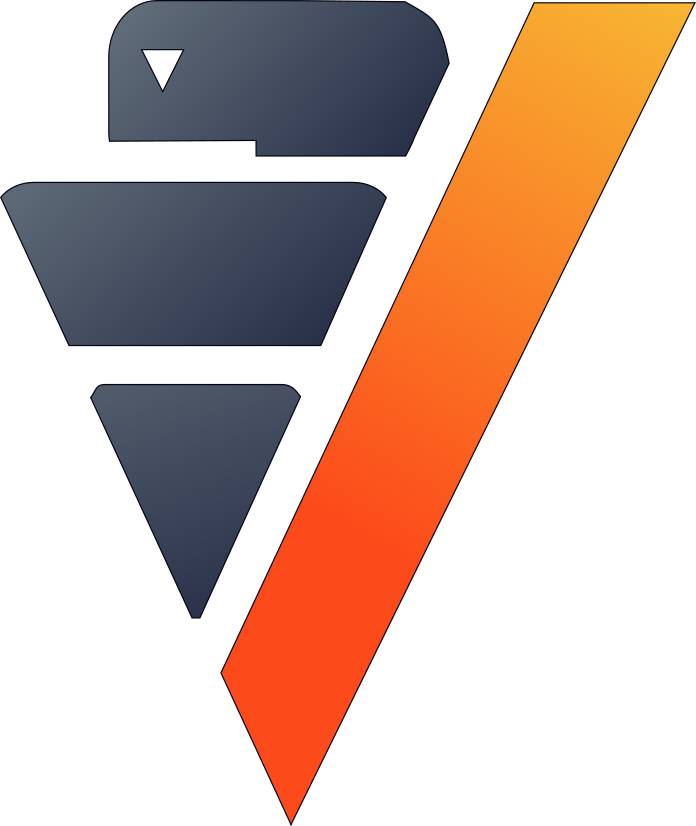

In [2]:
from verticapy.datasets import load_titanic

load_titanic()

Supposing we are only interested in the 'survived', 'pclass', 'age', 'parch', and 'sibsp' columns, we can create a vDataFrame with just those columns by specifying them in the `usecols` parameter:

,123pclassInteger,123survivedInteger,123ageNumeric(8),123sibspInteger,123parchInteger
1,1,0,71.0,0,0
2,1,0,17.0,0,0
3,1,0,27.0,1,0
4,1,0,37.0,1,1
5,1,0,[null],0,0
6,1,0,31.0,1,0
7,1,0,[null],0,0
8,1,0,37.0,1,0
9,1,0,24.0,0,0
10,1,0,45.0,1,0

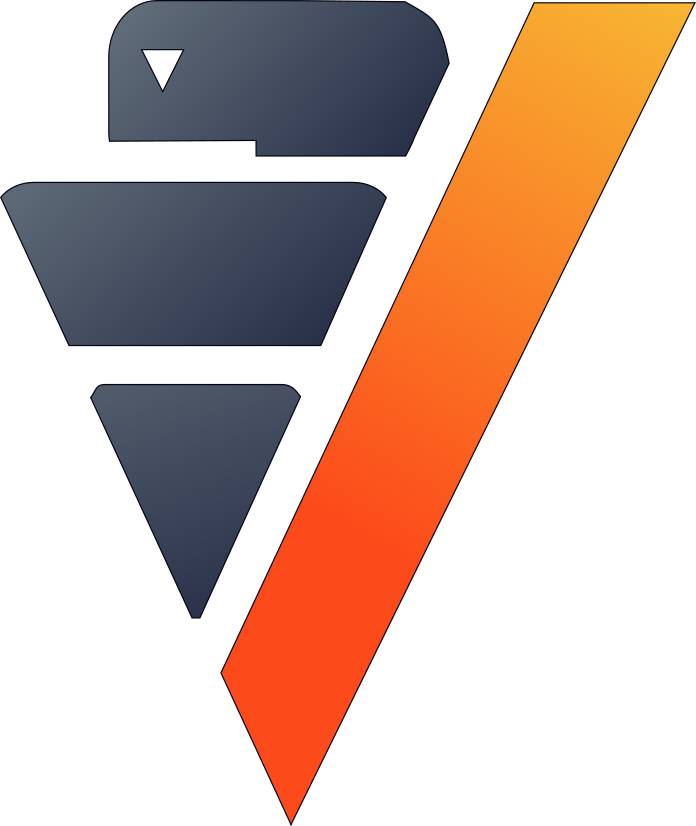

In [3]:
import verticapy as vp

vdf = vp.vDataFrame("public.titanic",
                    usecols = ["survived", "pclass", "age", "parch", "sibsp"])
display(vdf)

If we run the `avg()` method without specifying columns, all numerical vDataFrame columns are included in the operation:

> **_NOTE:_**  To examine the generated SQL for each command, turn on the "sql_on" option.

,avg
"""pclass""",2.28444084278768
"""survived""",0.364667747163695
"""age""",30.1524573721163
"""sibsp""",0.504051863857374
"""parch""",0.378444084278768

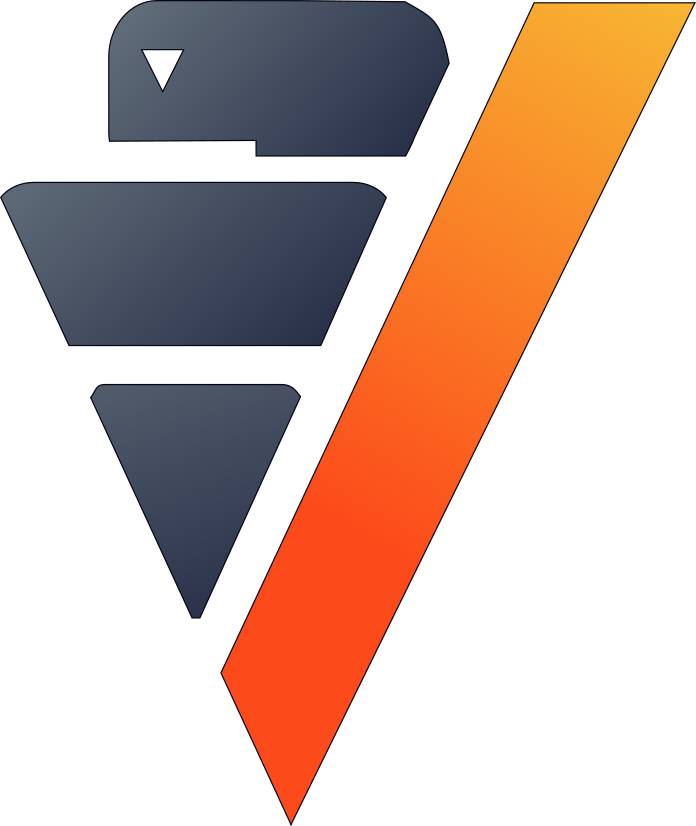

In [4]:
vp.set_option("sql_on", True)
vdf.avg()

To restrict the operation to specific columns in the vDataFrame, provide the column names in the `columns` parameter:

,avg
"""age""",30.1524573721163
"""survived""",0.364667747163695

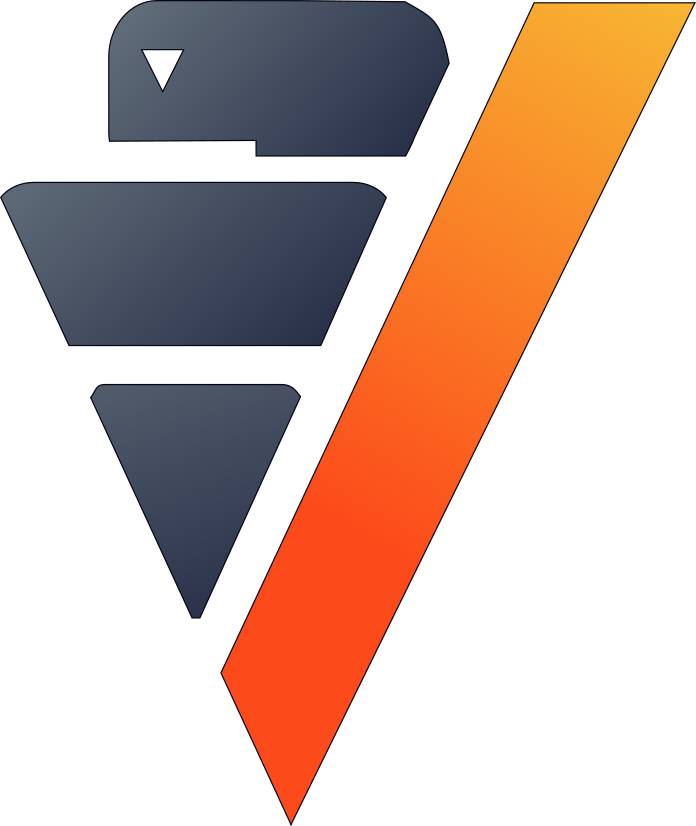

In [5]:
vdf.avg(columns = ["age", "survived"])

As we are working with a small dataset, the perfomance impact of excluding unncessary columns is not very significant. However, with large datasets (e.g. greater than a TB), the impact is much greater, and choosing essential columns becomes a key step in improving performance.

Instead of specifying essential columns to include, some methods allow you to list the columns to exclude with the `exclude_columns` parameter:

In [6]:
vdf.numcol(exclude_columns = ["parch", "sibsp"])

['"pclass"', '"survived"', '"age"']

> **_NOTE:_** To list all columns in a vDataFrame, including non-numerical columns, use the `get_columns()` method.

You can then use this truncated list of columns in another method call; for instance, to compute a correlation matrix:

In [7]:
vdf.corr(columns = vdf.numcol(exclude_columns = ["parch", "sibsp"]))

To turn off the SQL code generation option:

In [8]:
vp.set_option("sql_on", False)

## 2. Save the current relation

The vDataFrame works like a [view](https://docs.vertica.com/latest/en/data-analysis/views/), a stored query the encapsulates one or more SELECT statements. If the generated relation uses many different functions, the computation time for each method call is greatly increased.

Small transformations don't drastically slow down computation, but heavy transformations (multiple joins, frequent use of advanced analytical funcions, moving windows, etc.) can result in noticeable slowdown. When performing computationally expensive operations, you can aid performance by saving the vDataFrame structure as a table in the Vertica database. We will demonstrate this process in the following example.

First, create a vDataFrame, then perform some operations on that vDataFrame:

In [9]:
vdf = vp.vDataFrame("public.titanic")
vdf["sex"].label_encode()["boat"].fillna(method = "0ifnull")["name"].str_extract(
    ' ([A-Za-z]+)\.').eval("family_size", expr = "parch + sibsp + 1").drop(
    columns = ["cabin", "body", "ticket", "home.dest"])["fare"].fill_outliers().fillna()
print(vdf.current_relation())

795 elements were filled.
(
   SELECT
     "pclass",
     "survived",
     "name",
     "sex",
     "age",
     "sibsp",
     "parch",
     COALESCE("fare", 32.9113074018842) AS "fare",
     "embarked",
     "boat",
     "family_size" 
   FROM
 (
   SELECT
     "pclass",
     "survived",
     REGEXP_SUBSTR("name", ' ([A-Za-z]+)\.') AS "name",
     DECODE("sex", 'female', 0, 'male', 1, 2) AS "sex",
     COALESCE("age", 30.1524573721163) AS "age",
     "sibsp",
     "parch",
     (CASE WHEN "fare" < -176.6204982585513 THEN -176.6204982585513 WHEN "fare" > 244.5480856064831 THEN 244.5480856064831 ELSE "fare" END) AS "fare",
     COALESCE("embarked", 'S') AS "embarked",
     DECODE("boat", NULL, 0, 1) AS "boat",
     parch + sibsp + 1 AS "family_size" 
   FROM
 (
                
   SELECT
     
                    "pclass",
     "survived",
     "name",
     "sex",
     "age",
     "sibsp",
     "parch",
     "fare",
     "embarked",
     "boat" 
                
   FROM
 "public"."titani

To understand how Vertica executes the different aggregations in the above relation, let's take a look at the query plan:

> **_NOTE:_** Query plans can be hard to interpret if you don't know how to parse them. For more information, see [query plan information and structure](https://docs.vertica.com/24.1.x/en/admin/managing-queries/query-plans/query-plan-information-and-structure/).

In [10]:
print(vdf.explain())

------------------------------ 
QUERY PLAN DESCRIPTION: 

EXPLAIN SELECT /*+LABEL('vDataframe.explain')*/ * FROM (SELECT "pclass", "survived", "name", "sex", "age", "sibsp", "parch", COALESCE("fare", 32.9113074018842) AS "fare", "embarked", "boat", "family_size" FROM (SELECT "pclass", "survived", REGEXP_SUBSTR("name", ' ([A-Za-z]+)\.') AS "name", DECODE("sex", 'female', 0, 'male', 1, 2) AS "sex", COALESCE("age", 30.1524573721163) AS "age", "sibsp", "parch", (CASE WHEN "fare" < -176.6204982585513 THEN -176.6204982585513 WHEN "fare" > 244.5480856064831 THEN 244.5480856064831 ELSE "fare" END) AS "fare", COALESCE("embarked", 'S') AS "embarked", DECODE("boat", NULL, 0, 1) AS "boat", parch + sibsp + 1 AS "family_size" FROM ( SELECT "pclass", "survived", "name", "sex", "age", "sibsp", "parch", "fare", "embarked", "boat" FROM "public"."titanic") VERTICAPY_SUBTABLE) VERTICAPY_SUBTABLE) VERTICAPY_SUBTABLE

Access Path:
+-STORAGE ACCESS for titanic [Cost: 129, Rows: 1K (NO STATISTICS)] (PATH ID: 

Looking at the plan and its associated relation, it's clear that the transformations we applied to the vDataFrame result in a complicated relation. Each method call to the vDataFrame must use this relation for computation. 

To save the relation as a table in the Vertica and replace the current relation in VerticaPy with the new table relation, use the [`to_db()`](https://www.vertica.com/python/documentation/1.0.x/html/verticapy.vDataFrame.to_db.html) method with the `inplace` parameter set to True:

In [11]:
vp.drop("public.titanic_clean", method = "table") # drops any existing table with the same schema and name
vdf.to_db("public.titanic_clean",
          relation_type = "table",
          inplace = True)
print(vdf.current_relation())

"public"."titanic_clean"


When dealing with very large datasets, it's best to take caution before saving relations with complicated transformations. Ideally, you will perform a thorough data exploration, and only execute heavy transformations when essential.

## 3. Use the help function

For a quick and convenient way to view information about an object or function, use the `help()` function:

In [12]:
help(vp.connect)

Help on function connect in module verticapy.connection.connect:

connect(section: str, dsn: Optional[str] = None) -> None
    Connects to the database.
    
    Parameters
    ----------
    section: str
        Name of the section in the
        configuration file.
    dsn: str, optional
        Path to the file containing
        the credentials. If empty,
        the Connection File will be
        used.
    
    Examples
    --------
    Display all available connections:
    
    .. code-block:: python
    
        from verticapy.connection import available_connections
    
        available_connections()
    
    ``['VML', 'VerticaDSN', 'VerticaDSN_test']``
    
    Connect using the VerticaDSN connection:
    
    .. code-block:: python
    
        from verticapy.connection import connect
    
        connect("VerticaDSN")
    
    .. seealso::
    
        | :py:func:`~verticapy.connection.available_connections` :
            Displays all available connections.
        | :py:

## 4. Close your connections

Each connection to the database increases the concurrency on the system, so try to close connections when you're done with them. VerticaPy simplifies the connection process by allowing the user to create an auto-connection, but the closing of connections must be done manually with the `close_connection()` function.

To demonstrate, create a database connection:

In [ ]:
vp.connect("VerticaDSN")

When you are done making changes, close the connection with the `close_connection()` function:

In [ ]:
vp.close_connection()

It is especially important to close connections when you are working in an environment with mutliple users.

## 5. Consider a method's time complexity

Some techniques are significantly more computationally expensive than others. For example, a Kendall correlation is very expensive compared to a Pearson correlation because, unlike Pearson, Kendall correlations use a cross join, resulting in a time complexity of O(n*n) (where n is the number of rows). Let's compare the time needed to compute these two correlations on the 'titanic' dataset:

In [13]:
import time

vdf = vp.vDataFrame("public.titanic")

start_time = time.time()
x = vdf.corr(method = "pearson", show = False)
print("Pearson, time: {0}".format(time.time() - start_time))

start_time = time.time()
x = vdf.corr(method = "kendall", show = False)
print("Kendall, time: {0}".format(time.time() - start_time))

Pearson, time: 0.17660832405090332


100%|██████████| 6/6 [00:00<00:00, 2943.03it/s]


Kendall, time: 0.857501745223999


The Kendall correlation matrix takes longer to compute than the Pearson matrix. As we are using a relatively small dataset, this difference is not very large, but it increases in magntiude with the size of the dataset. Taking into account the time complexity of operations is a key step in optimzing performance, esepcially with large datasets.

## 6. Limit plot elements

Graphics are an essential tool to understand your data, but they can become difficult to parse if they contain too many elements. VerticaPy provides options that restrict plots to specified elements. To demonstrate, let's first draw a multi-histogram with a categorical column with thousands of categories:

In [15]:
vdf.bar(["name", "survived"])

VerticaPy outputs the bar chart, but the number of categories makes the graph basically incomprehensible. Instead, whenever possible, try to create graphics with as few categories as possible for your use case:

In [16]:
vdf.hist(["pclass", "survived"])

To view the cardinality of your variables, use the `nunique()` method:

,approx_unique
"""pclass""",3.0
"""survived""",2.0
"""name""",1233.0
"""sex""",2.0
"""age""",96.0
"""sibsp""",7.0
"""parch""",8.0
"""ticket""",888.0
"""fare""",275.0
"""cabin""",181.0

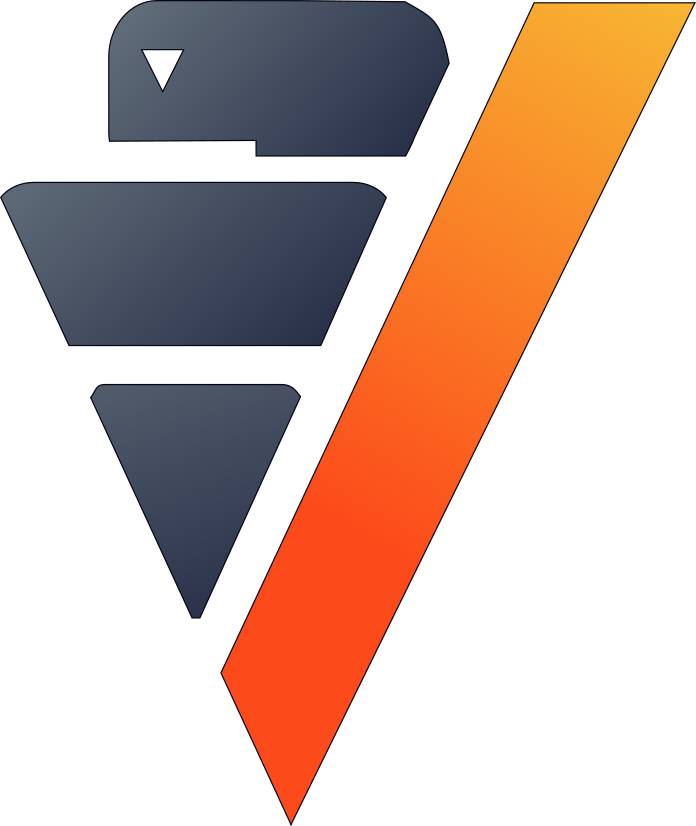

In [17]:
vdf.nunique()

## 7. Filter unnecessary data

Filtering your data is a crucial step in data preparation. Proper filtering avoids unnecessary computations and greatly improves the performance of each method call. While the performance impact can be minimal for small datasets, filtering large datasets is key to improving performance.

For example, if we are only interested in analyzing Titanic passengers who didn't have a lifeboat, we can filter on this requirement using the [`filter()`](https://www.vertica.com/python/documentation/1.0.x/html/verticapy.vDataFrame.filter.html) method: 

795 elements were filtered.


,123pclassInteger,123survivedInteger,AbcVarchar(164),AbcsexVarchar(20),123ageNumeric(8),123sibspInteger,123parchInteger,AbcticketVarchar(36),123fareNumeric(12),AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInteger,AbcVarchar(100)
1,1,1,,male,37.0,1,1,11751,52.5542,D35,S,5,[null],
2,1,1,,male,26.0,0,0,111369,30.0,C148,C,5,[null],
3,1,1,,female,35.0,0,0,PC 17760,135.6333,C99,S,8,[null],
4,1,1,,female,60.0,0,0,11813,76.2917,D15,C,8,[null],
5,1,1,,male,45.0,0,0,PC 17594,29.7,A9,C,7,[null],
6,1,1,,female,27.0,1,1,PC 17558,247.5208,B58 B60,C,6,[null],
7,1,1,,female,35.0,1,0,113803,53.1,C123,S,D,[null],
8,1,1,,male,53.0,0,0,113780,28.5,C51,C,B,[null],
9,1,1,,female,19.0,0,0,112053,30.0,B42,S,3,[null],
10,1,1,,female,58.0,0,1,PC 17582,153.4625,C125,S,3,[null],

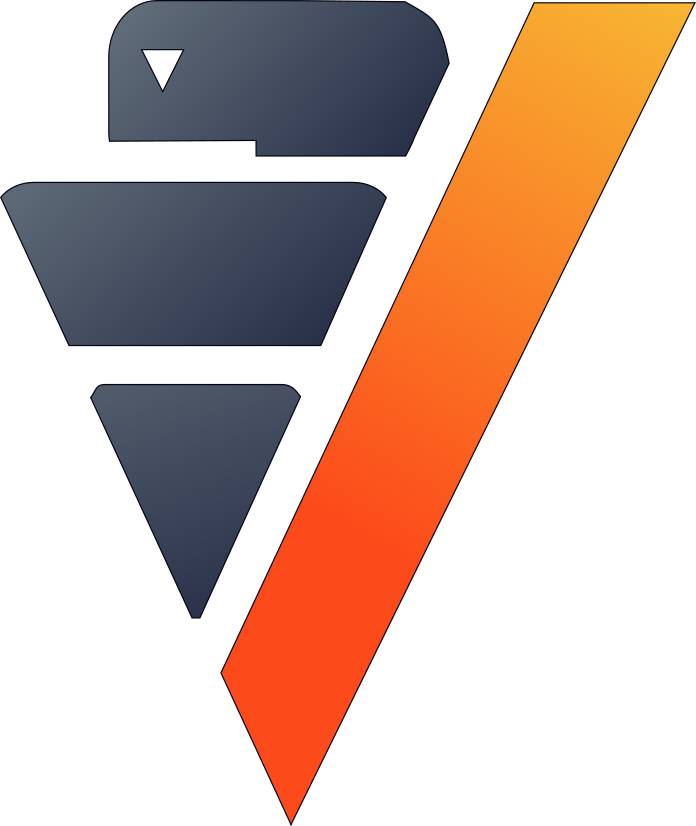

In [18]:
vdf.filter("boat IS NOT NULL")

To drop unnecessary columns from your vDataFrame, use the [`drop()`](https://www.vertica.com/python/documentation/1.0.x/html/verticapy.vDataFrame.drop.html) method:

,123pclassInteger,123survivedInteger,AbcsexVarchar(20),123ageNumeric(8),123sibspInteger,123parchInteger,AbcticketVarchar(36),123fareNumeric(12),AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),AbcVarchar(100)
1,1,1,male,0.92,1,2,113781,151.55,C22 C26,S,11,
2,1,1,female,18.0,1,0,PC 17757,227.525,C62 C64,C,4,
3,1,1,male,80.0,0,0,27042,30.0,A23,S,B,
4,1,1,female,42.0,0,0,PC 17757,227.525,[null],C,4,
5,1,1,male,25.0,1,0,11967,91.0792,B49,C,7,
6,1,1,female,45.0,0,0,PC 17608,262.375,[null],C,4,
7,1,1,female,22.0,0,1,113505,55.0,E33,S,6,
8,1,1,female,[null],0,0,17770,27.7208,[null],C,5,
9,1,1,female,22.0,0,0,113781,151.55,[null],S,11,
10,1,1,female,64.0,0,2,PC 17756,83.1583,E45,C,14,

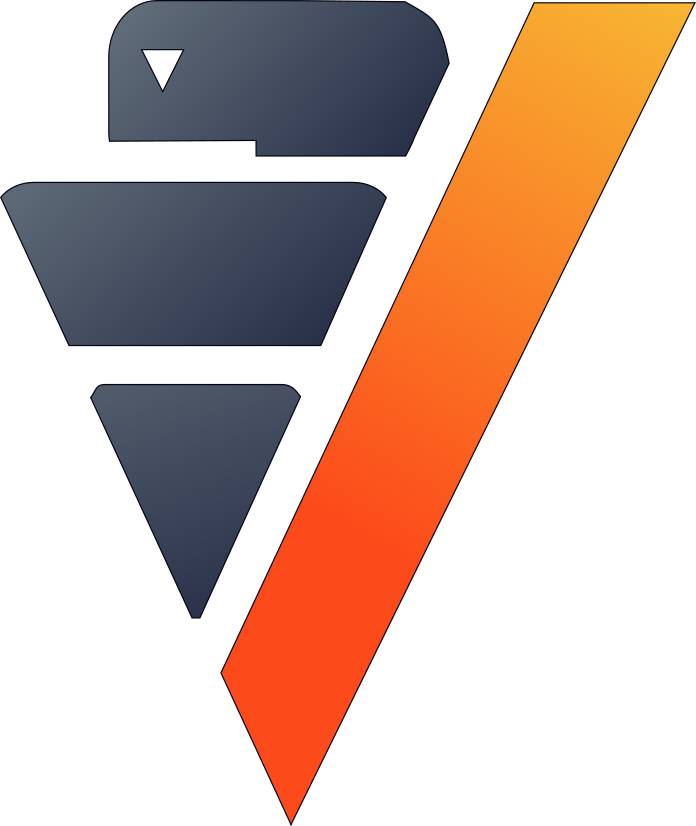

In [19]:
vdf.drop(["name", "body"])

The dropped columns are excluded from the relation's generated SELECT query:

In [20]:
print(vdf.current_relation())

(
   SELECT
     * 
   FROM
 (
                
   SELECT
     
                    "pclass",
     "survived",
     "sex",
     "age",
     "sibsp",
     "parch",
     "ticket",
     "fare",
     "cabin",
     "embarked",
     "boat",
     "home.dest" 
                
   FROM
 "public"."titanic") 
VERTICAPY_SUBTABLE 
   WHERE (boat IS NOT NULL)) 
VERTICAPY_SUBTABLE


## 8. Maximize your resources

Large datasets often contain hundreds of columns. These datasets require VerticaPy to compute many concurrent, resource-intensive aggregations. To limit the impact of these aggregations, you can control the number of queries that VerticaPy sends to the system, which allows for some useful optimizations.

In the following example, we'll explore a couple of these optimizations. First, generate a dataset:

,123x0Float(22),123x1Float(22),123x2Float(22),123x3Float(22),123x4Float(22),123x5Float(22),123x6Float(22),123x7Float(22),123x8Float(22),123x9Float(22),123x10Float(22),123x11Float(22),123x12Float(22),123x13Float(22),123x14Float(22),123x15Float(22),123x16Float(22),123x17Float(22),123x18Float(22),123x19Float(22)
1,7.07397703081369e-05,0.0787740496452898,0.115318223834038,0.675260862102732,0.454256983939558,0.612441120436415,0.710587008856237,0.656174514908344,0.929624147713184,0.794853629544377,0.287497493438423,0.693544203415513,0.208437475375831,0.756020798813552,0.772001166362315,0.892991768661886,0.248670872766525,0.491525070974603,0.66170282359235,0.0471792332828045
2,8.221878670156e-05,0.664888116065413,0.083972045686096,0.568629627348855,0.572966161184013,0.783750915434211,0.560252866242081,0.317204114282504,0.0637373190838844,0.134130723774433,0.458569357637316,0.789060909301043,0.694081055233255,0.684782675467432,0.728241338860244,0.148084834218025,0.675027774646878,0.22694622608833,0.677556065144017,0.687195596750826
3,0.000162084121257067,0.666780518833548,0.471131122438237,0.489033610327169,0.413613711716607,0.450382014503703,0.721551714930683,0.912379769841209,0.475080049596727,0.786981134908274,0.940750791225582,0.50642477418296,0.653000021819025,0.257536737946793,0.351418826729059,0.356383176054806,0.442061832174659,0.544653700198978,0.933788935421035,0.261729783844203
4,0.000172695610672235,0.538448342122138,0.0114666193258017,0.15314542199485,0.68178574857302,0.322206106502563,0.824309630319476,0.632614301284775,0.408781875390559,0.71936245681718,0.21350727416575,0.662019907031208,0.146308450959623,0.537607988808304,0.416217104066163,0.226778261363506,0.550271776737645,0.440038891974837,0.906709315488115,0.630714946193621
5,0.000215996988117695,0.440047195181251,0.403162910602987,0.649770956486464,0.759415340377018,0.6369431510102,0.662149624433368,0.944483974715695,0.411118406802416,0.506381524959579,0.968799884431064,0.93660238571465,0.15649419859983,0.567954865284264,0.0799761395901442,0.285689088748768,0.810797542799264,0.125172117492184,0.63526348141022,0.690739138750359
6,0.000235316576436162,0.731702069053426,0.0454661028925329,0.182908847462386,0.778532564872876,0.265417562564835,0.55734150740318,0.482840053969994,0.19379152241163,0.794033095473424,0.347327131545171,0.989177622832358,0.593036794103682,0.133990262635052,0.241174938390031,0.747349292039871,0.509102256270126,0.427678616018966,0.392592984251678,0.0654848476406187
7,0.000279249157756567,0.28437186894007,0.641281842254102,0.381525793578476,0.925038357963786,0.335285265231505,0.774883880047128,0.520290001993999,0.890124120982364,0.867110275430605,0.598176734521985,0.916347541147843,0.192046095384285,0.0858447118662298,0.217270190594718,0.097629978787154,0.756692398572341,0.00557059771381319,0.850608402863145,0.454450654564425
8,0.000304699409753084,0.633377789054066,0.492939325980842,0.203626787988469,0.942555516026914,0.657857748912647,0.605496536241844,0.626292253145948,0.931696797255427,0.98450671765022,0.49190244753845,0.628941232338548,0.89045607461594,0.436812720261514,0.561929893679917,0.297366416547447,0.152835283894092,0.267463113879785,0.86299324571155,0.923588463105261
9,0.000328358961269259,0.867208939278498,0.269665719009936,0.373476926004514,0.203031167155132,0.123003569431603,0.463740748818964,0.24328449065797,0.771818584762514,0.56956998561509,0.876726258080453,0.876385713694617,0.881894226418808,0.420320559293032,0.657797486986965,0.412749577080831,0.447113524423912,0.211105825845152,0.667003343580291,0.43986318516545
10,0.000365900108590722,0.596844155108556,0.674576356075704,0.91947619151324,0.379827807657421,0.899701782036573,0.52025105827488,0.809916381258518,0.473883915692568,0.213705440284684,0.2360272067599,0.139547993894666,0.0802076722029597,0.34740579710342,0.0541830838192254,0.745313023449853,0.548075758852065,0.31719421944581,0.919335188576952,0.320289980620146

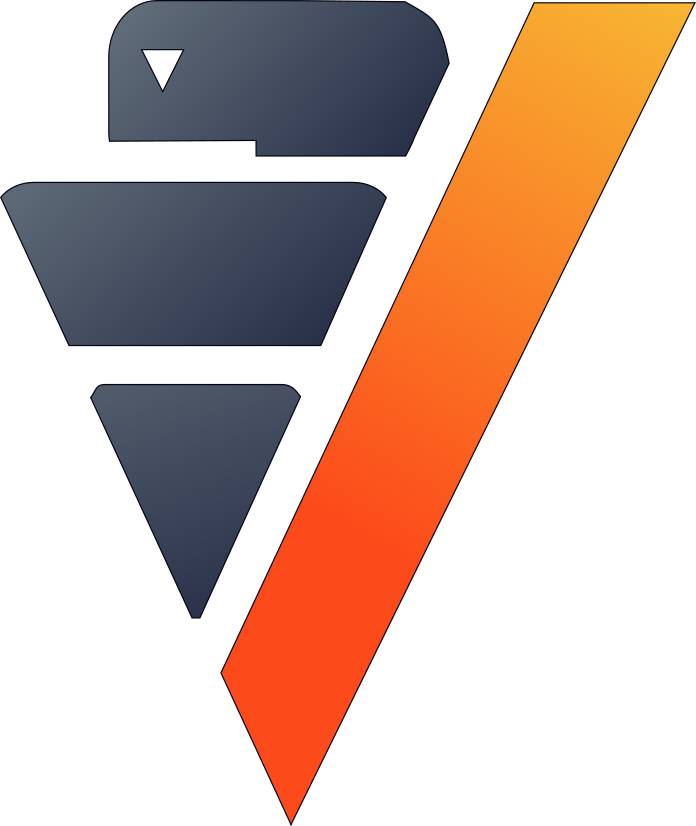

In [21]:
from verticapy.datasets import gen_dataset

vp.drop("public.test_dataset", method= "table") # drop an existing table with the same schema and name
features_ranges = {}
for i in range(20):
    features_ranges[f"x{i}"] = {"type": float, "range": [0, 1]}
vp.drop("test_dataset", method = "table")
vdf = gen_dataset(features_ranges, nrows = 100000).to_db("test_dataset", 
                                                        relation_type = "table", 
                                                        inplace = True)
display(vdf)

To monitor how VerticaPy is computing the aggregations, use the `set_option()` function to turn on SQL code generation and turn off cache:

In [22]:
vp.set_option("sql_on", True)
vp.set_option("cache", False)

VerticaPy allows you to send multiple queries, either iteratively or concurrently, to the database when computing aggregations.

First, let's send a single query to compute the average for all columns in the vDataFrame:

,avg
"""x0""",0.499510914725466
"""x1""",0.500098380795368
"""x2""",0.498650639873019
"""x3""",0.498249878197482
"""x4""",0.498723634853531
"""x5""",0.49859746068794
"""x6""",0.499440802120219
"""x7""",0.500571392295512
"""x8""",0.500615366488232
"""x9""",0.500191712573576

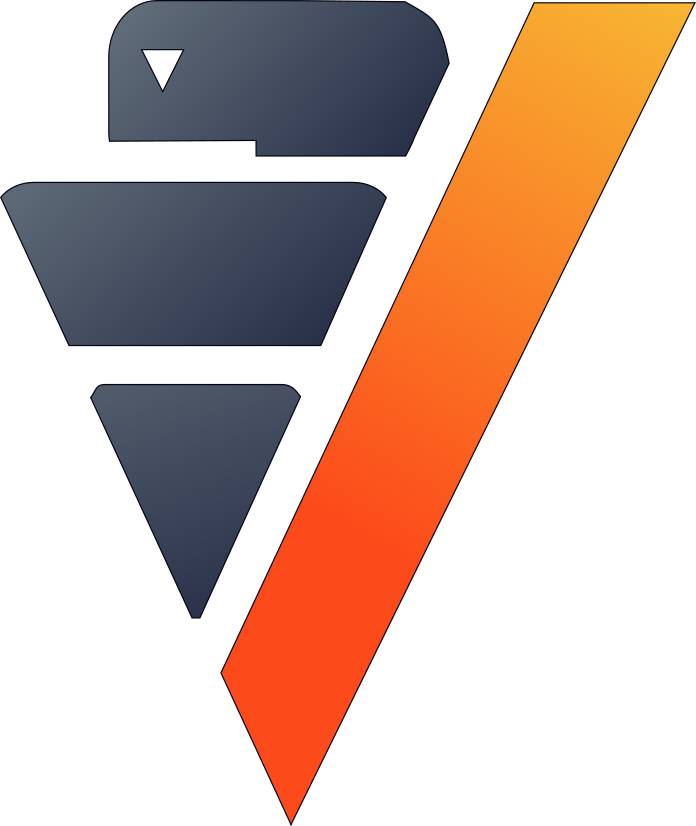

In [23]:
display(vdf.avg(ncols_block = 20))

We see that there was one SELECT query for all columns in the vDataFrame. You can reduce the impact on the system by using the `ncols_block` parameter to split the computation into multiple iterative queries, where the value of the parameter is the number of columns included in each query.

For example, setting `ncols_block` to 5 will split the computation, which consists of 20 total columns, into 4 separate queries, each of which computes the average for 5 columns:

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:00,  7.57it/s]

 50%|█████     | 2/4 [00:00<00:00,  7.35it/s]

 75%|███████▌  | 3/4 [00:00<00:00,  7.44it/s]

100%|██████████| 4/4 [00:00<00:00,  7.50it/s]


,avg
"""x0""",0.499510914725466
"""x1""",0.500098380795368
"""x2""",0.498650639873019
"""x3""",0.498249878197482
"""x4""",0.498723634853531
"""x5""",0.49859746068794
"""x6""",0.499440802120219
"""x7""",0.500571392295512
"""x8""",0.500615366488232
"""x9""",0.500191712573576

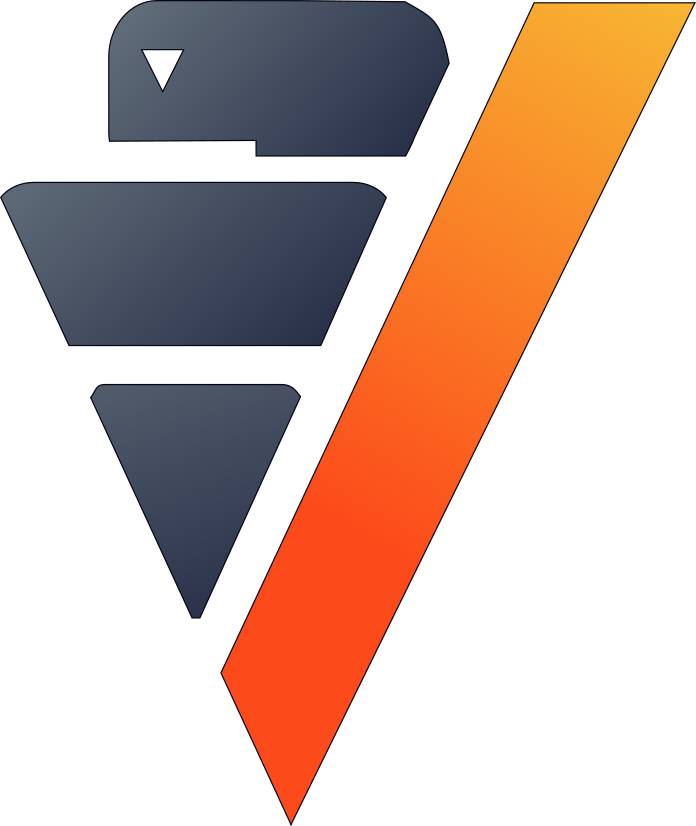

In [24]:
display(vdf.avg(ncols_block = 5))

In addition to spliting up the computation into separate queries, you can send multiple queries to the database concurrently. You specify the number of concurrent queries with the `processes` parameter, which defines the number of workers involved in the computation. Each child process creates a DB connection and then sends its query. In the following example, we use 4 'processes':

,avg
"""x0""",0.499510914725466
"""x1""",0.500098380795368
"""x2""",0.498650639873019
"""x3""",0.498249878197482
"""x4""",0.498723634853531
"""x5""",0.49859746068794
"""x6""",0.499440802120219
"""x7""",0.500571392295512
"""x8""",0.500615366488232
"""x9""",0.500191712573576

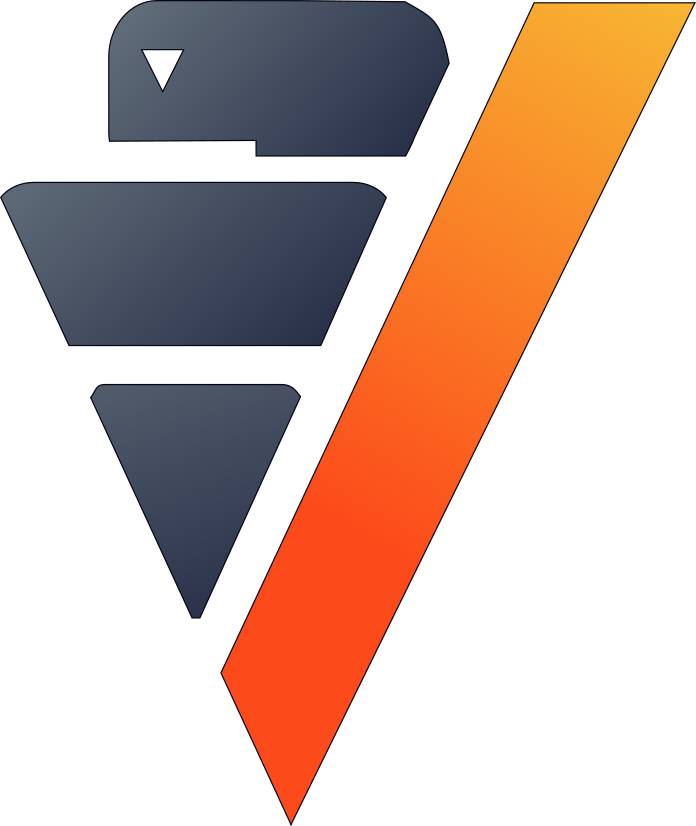

In [25]:
display(vdf.avg(ncols_block = 5, processes = 4))

Whether it's best to send multiple queries iteratively, in parallel, or in one single query depends on your specific use case, and often on the structure of your dataset.